Obtendo os dados complestos do ENEM 2019

In [14]:
!wget http://download.inep.gov.br/microdados/microdados_enem_2019.zip

--2020-10-24 14:49:11--  http://download.inep.gov.br/microdados/microdados_enem_2019.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 665939887 (635M) [application/zip]
Saving to: ‘microdados_enem_2019.zip.1’

                mic   4%[                    ]  28.91M  1.05MB/s    eta 8m 5s  ^C


Extraindo o arquivo dos microdados

In [17]:
from zipfile import ZipFile
arquivoZip = ZipFile ('microdados_enem_2019.zip')
arquivoZip.extract(member='DADOS/MICRODADOS_ENEM_2019.csv')
arquivoZip.close()

'/content/DADOS/MICRODADOS_ENEM_2019.csv'

Função para leitura dos dados publicada pelo @din00 no discord

In [19]:
def get_big_data(filepath, query, sep=',', encoding='latin'):
  return pd.concat(
      [chunk.query(query) for chunk in pd.read_csv(
          filepath, 
          sep=sep, 
          encoding=encoding, 
          chunksize = 10**6)])

Leiturados do dados filtrando por residentes no estado do Espirito Santo

In [21]:
dados_es = get_big_data('DADOS/MICRODADOS_ENEM_2019.csv', "SG_UF_RESIDENCIA=='ES'", sep=';')

In [23]:
dados_es

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
10933,190001015560,2019,3202405,Guarapari,32,ES,18,F,1,1,1,1503093.0,Goianésia do Pará,15.0,PA,2,0,2,1.0,0,32043686.0,3202405.0,Guarapari,32.0,ES,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,DCDCBBAEECCEDCDBDDECADBDDAEBDCCEADCBDCCDBCCAD,DBABD99999CBBBCDCDEAEBDBDCCEAEDEEBEACDCBEEBCBA...,CBDEABDCBECADBCADCACABCADBCDABEADCABECBDBEDBD,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,40.0,40.0,100.0,0.0,300.0,E,E,F,B,3,H,A,C,D,C,A,C,A,B,A,B,A,B,C,A,A,D,A,A,B
13712,190001018339,2019,3201308,Cariacica,32,ES,19,M,1,5,1,3205309.0,Vitória,32.0,ES,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,5,D,A,C,D,B,A,B,A,B,A,B,A,A,B,B,A,D,A,A,B
172006,190001176639,2019,3205200,Vila Velha,32,ES,25,F,2,3,1,1600303.0,Macapá,16.0,AP,1,7,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,F,B,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,B,C,A,A,B
224152,190001228785,2019,3204906,São Mateus,32,ES,49,F,3,3,1,2931350.0,Teixeira de Freitas,29.0,BA,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EDEAABADBABACACABEEABDBECBDAAEAECDDECAACEADDD,EDDBA99999BDDCBCBABDCAADBBDBEEAEAEDAABEACCACCD...,ECBDAEECAEECAACE.CCBAECAABBCCCCCEEACAEEEAECBC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,80.0,80.0,60.0,80.0,20.0,320.0,A,A,B,A,1,B,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,B,A,B,B
227545,190001232178,2019,3205002,Serra,32,ES,39,M,2,3,1,2906303.0,Canavieiras,29.0,BA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEBCCBABAAAADEEEEACACABEEDBCCDDAEEDEADBDEACDB,99999DBCADCCBAADDBBDDBAECAACCECCACCDEDAAADBCBC...,BAEBCDDAAEBCBCDAADDACDCBDBEEABAAEDAACBCCADADB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,160.0,120.0,120.0,760.0,A,C,A,B,2,A,A,B,D,A,A,B,A,A,A,B,A,A,A,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088917,190006111416,2019,3205002,Serra,32,ES,17,F,0,3,1,3205002.0,Serra,32.0,ES,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEBBABCBDACCBCAEEDECCDCCEABCBAAABADDADBEECCEB,99999ABAAEBCBCADEBCCEACEDEBECDDEEBCADBDADDAEBC...,CBBBBCECBDACDAACBECBABEDBECCBBDACDCABCCBABCBC,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBB

Exportando os dados para csv, para ser disponibilizado do [Github](https://)

In [53]:
from google.colab import files

dados_es.to_csv('MICRODADOS_ENEM_2019_ES.csv', index=False) 

arquivo_zip = zipfile.ZipFile('MICRODADOS_ENEM_2019_ES-csv.zip', 'w')
arquivo_zip.write('MICRODADOS_ENEM_2019_ES.csv', compress_type=zipfile.ZIP_DEFLATED)
 
arquivo_zip.close()
files.download('MICRODADOS_ENEM_2019_ES-csv.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analise dos dados

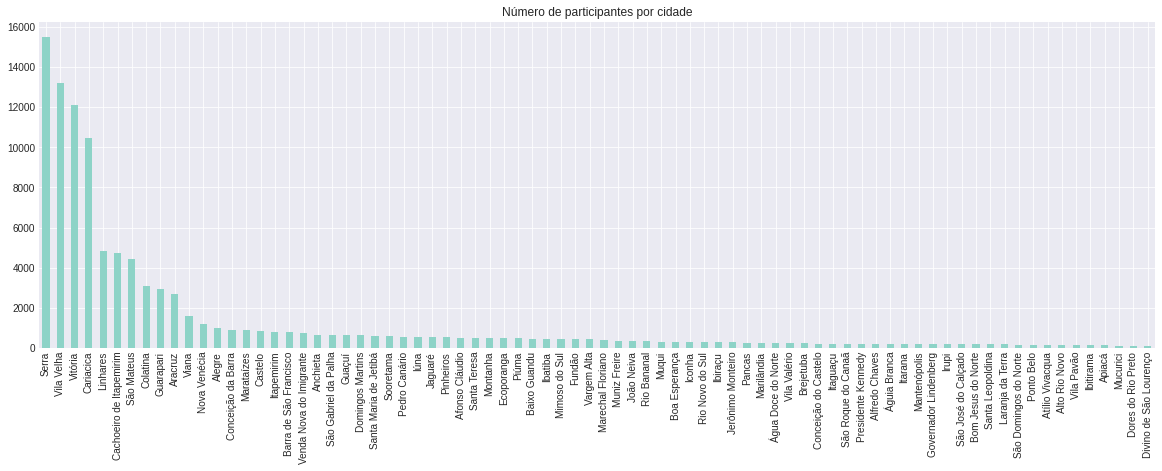

In [46]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

dados_es["NO_MUNICIPIO_RESIDENCIA"].value_counts().plot(
    kind="bar", 
    figsize=(20, 6),
    title="Número de participantes por cidade")

Text(0.5, 1.0, 'Boxplot das notas de total por prova')

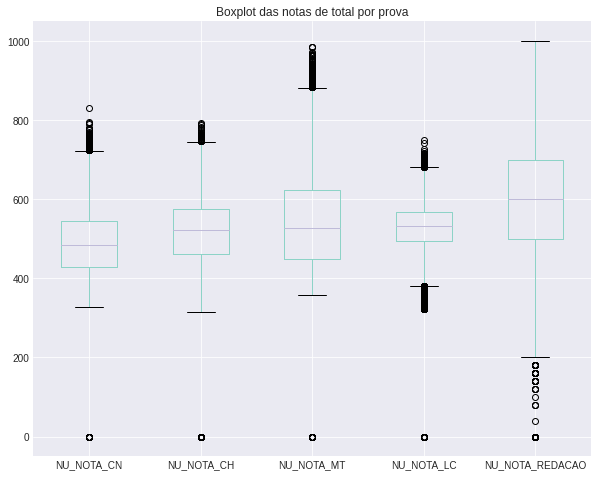

In [48]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados_es[provas].boxplot(grid=True, figsize= (10,8))
plt.title("Boxplot das notas de total por prova")